# Model#4
<img src="Model5_1.png">
<img src="Model5_2.png">

## Cell OCV curve

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import special
import time
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [3]:
def DOD_norm(df, dod_s, dod_e):
    df = df - np.min(df)
    b = (dod_e - dod_s)/np.max(df)
    df = df*b
    df = df + dod_s
    return df

In [4]:
def DOD_norm2(df, x_s, x_e):
    return (df - x_s) * 100/(x_e - x_s)

In [5]:
def re_DOD_norm2(df, x_s, x_e):
    return df*(x_e - x_s)/100 +  x_s

In [6]:
def dQdV(df_x, df_y, delta):
    dQ = abs(np.roll(df_x, delta) - np.roll(df_x, -delta))
    dV = abs(np.roll(df_y, delta) - np.roll(df_y, -delta))
    dQ = np.where(dQ <=0, np.nan, dQ)
    df_dQdV = dV/dQ
    df_dQdV[:delta] = np.nan
    df_dQdV[-delta:] = np.nan
    return df_dQdV

In [7]:
def smooth(df, delta):
    df_tmp = np.zeros((2*delta, len(df)))
    for i in range(delta):
        df_tmp[(i-1),:] = np.roll(df, i)
        df_tmp[(i-1+delta),:] = np.roll(df, -i)
    df_tmp2 = np.median(df_tmp, axis=0)
    df_tmp2[:delta] = np.nan
    df_tmp2[-delta:] = np.nan
    
    return df_tmp2

In [8]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [9]:
df_LCO_OCV = pd.read_csv('LCO_OCV1.csv')
df_LCO_OCV.columns = ['x', 'Potential(V)']
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=False)
df_LCO_OCV = df_LCO_OCV.reset_index(drop=True)
df_LCO_OCV['x'] = 1-df_LCO_OCV['x']

df_LCO_OCV['x'] = smooth(df_LCO_OCV['x'],20)
df_LCO_OCV['Potential(V)'] = smooth(df_LCO_OCV['Potential(V)'], 20)
df_LCO_OCV = df_LCO_OCV.dropna()
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=True)

In [10]:
df_LiC6_OCV = pd.read_csv('LiC6_OCV1.csv')
df_LiC6_OCV.columns = ['x', 'Potential(V)']
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=False)
df_LiC6_OCV = df_LiC6_OCV.reset_index(drop=True)
df_LiC6_OCV['x'] = 1-df_LiC6_OCV['x']
df_LiC6_OCV['x'] = smooth(df_LiC6_OCV['x'],10)
df_LiC6_OCV['Potential(V)'] = smooth(df_LiC6_OCV['Potential(V)'], 10)
df_LiC6_OCV = df_LiC6_OCV.dropna()
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=True)

In [11]:
x_p_s = 0.2
x_p_e = 0.99
x_n_s = 0.17
x_n_e = 0.94

df_LCO_OCV['DOD']  = DOD_norm2(df_LCO_OCV['x'], x_p_s, x_p_e)
df_LiC6_OCV['DOD']  = DOD_norm2(df_LiC6_OCV['x'], x_n_s, x_n_e)

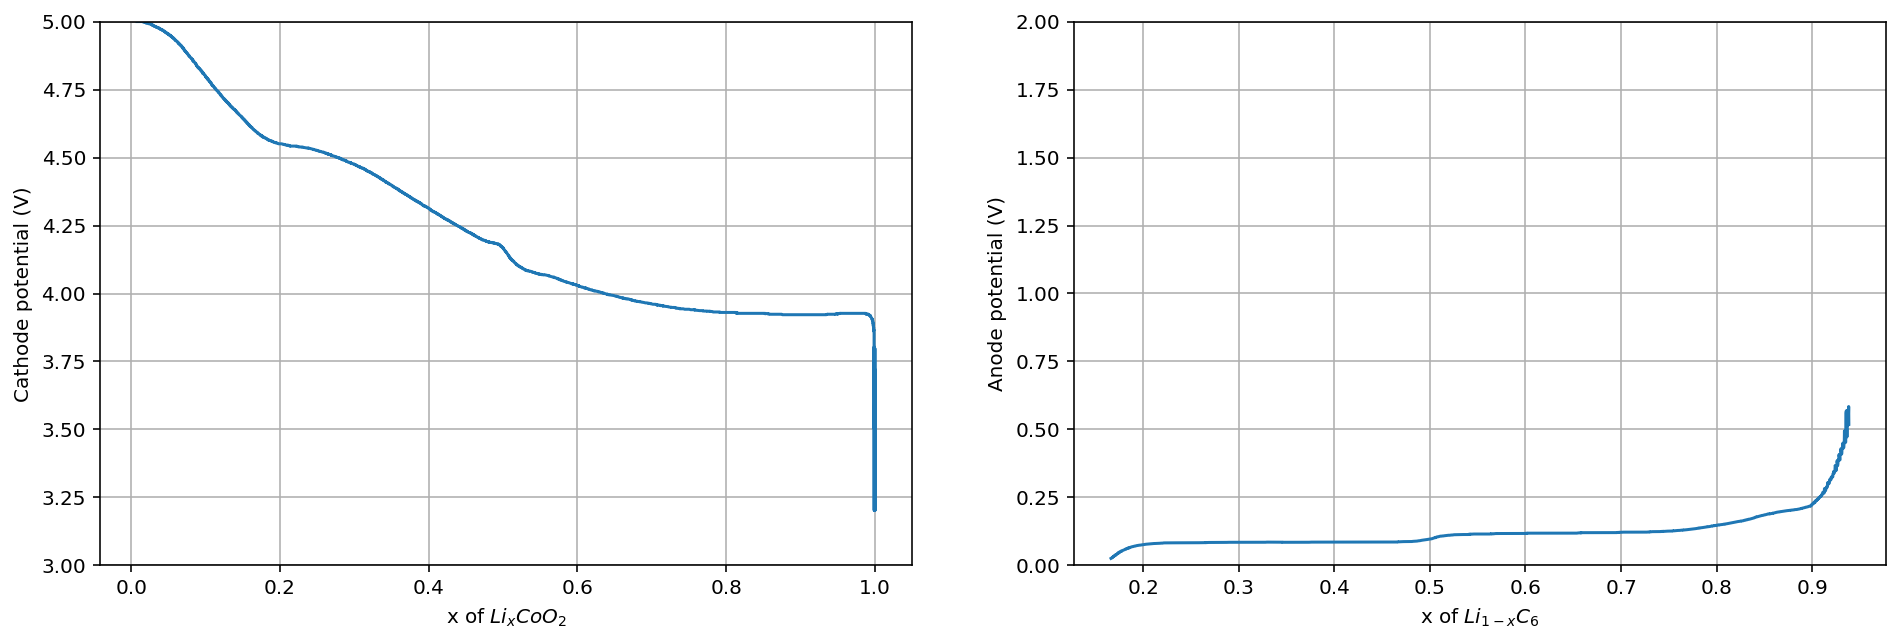

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LCO_OCV['x'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('x of $Li_{x}CoO_2$')
ax1.grid()

ax2.plot(df_LiC6_OCV['x'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('x of $Li_{1-x}C_6$')
ax2.grid()
plt.show()

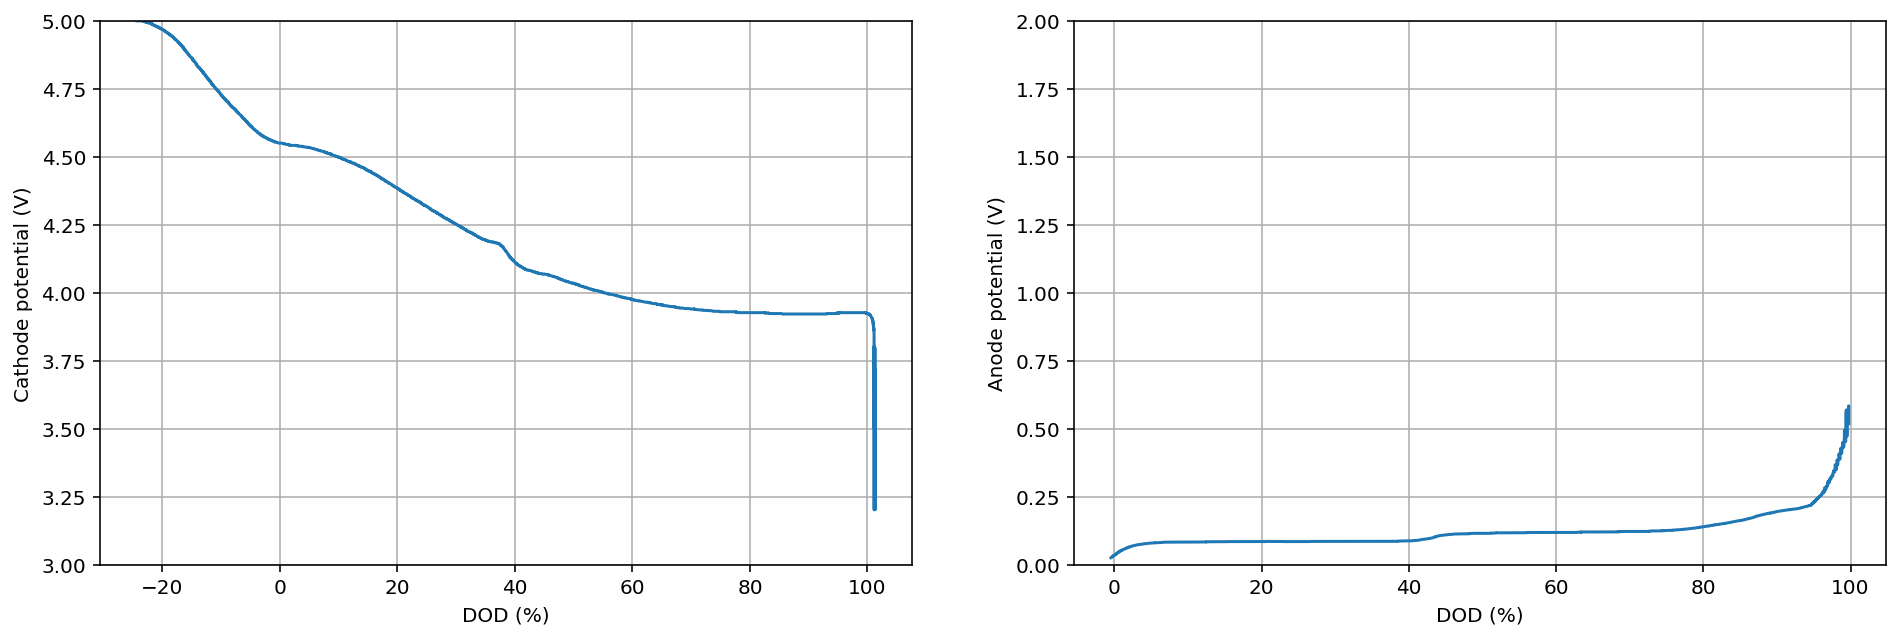

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LCO_OCV['DOD'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('DOD (%)')
ax1.grid()

ax2.plot(df_LiC6_OCV['DOD'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('DOD (%)')
ax2.grid()
plt.show()

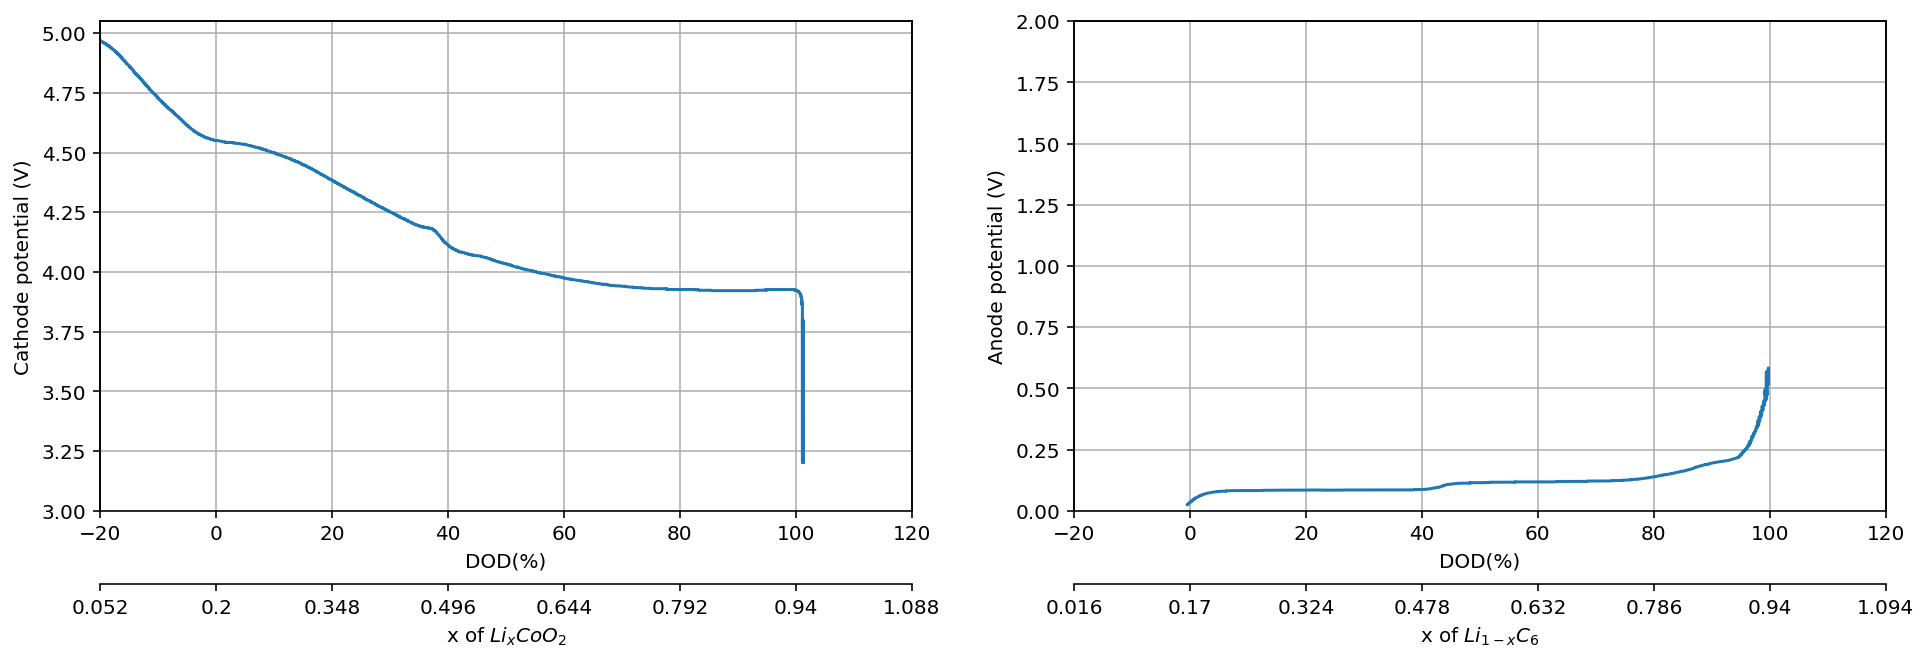

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

fig.subplots_adjust(bottom=0.2)
ax1.plot(df_LCO_OCV['DOD'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5.05])
ax1.set_xlim([-20,120])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('DOD(%)')
ax1.grid()

ax3 = ax1.twiny()
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
ax3.spines["bottom"].set_position(("axes", -0.15))

ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.spines["bottom"].set_visible(True)
ax3.set_xticks([-20,0,20,40,60,80,100,120])
ax3.set_xticklabels(re_DOD_norm2(np.array([-20,0,20,40,60,80,100,120]), x_p_s, x_n_e))
ax3.set_xlabel("x of $Li_{x}CoO_2$")


ax2.plot(df_LiC6_OCV['DOD'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_xlim([-20,120])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('DOD(%)')
ax2.grid()

ax4 = ax2.twiny()
ax4.xaxis.set_ticks_position("bottom")
ax4.xaxis.set_label_position("bottom")
ax4.spines["bottom"].set_position(("axes", -0.15))
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.spines["bottom"].set_visible(True)
ax4.set_xticks([-20,0,20,40,60,80,100,120])
ax4.set_xticklabels(re_DOD_norm2(np.array([-20,0,20,40,60,80,100,120]), x_n_s, x_n_e))
ax4.set_xlabel("x of $Li_{1-x}C_6$")



plt.show()

In [15]:
df_cell = pd.DataFrame(np.arange(1001))/10
df_cell.columns = ['DOD']
df_cell = pd.merge_asof(df_cell, df_LCO_OCV, on='DOD', direction='nearest')
df_cell = pd.merge_asof(df_cell, df_LiC6_OCV, on='DOD', direction='nearest')
df_cell.columns = ['DOD', 'Cathode x (-)', 'Cathode OCV (V)', 'Anode x (-)', 'Anode OCV (V)']
df_cell['Cell OCV (V)'] = (df_cell['Cathode OCV (V)']  - df_cell['Anode OCV (V)'] )
df_cell

,DOD,Cathode x (-),Cathode OCV (V),Anode x (-),Anode OCV (V),Cell OCV (V)
0,0.0,0.20032,4.55072,0.169631,0.034329,4.516391
1,0.1,0.20040,4.55072,0.170686,0.036918,4.513802
2,0.2,0.20132,4.55072,0.171753,0.039765,4.510955
3,0.3,0.20241,4.55072,0.172365,0.039610,4.511110
4,0.4,0.20341,4.54988,0.173068,0.042250,4.507630
...,...,...,...,...,...,...
996,99.6,0.98697,3.92698,0.936868,0.515807,3.411173
997,99.7,0.98797,3.92656,0.937583,0.515807,3.410753
998,99.8,0.98797,3.92656,0.938267,0.518913,3.407647
999,99.9,0.98897,3.92447,0.938267,0.518913,3.405557


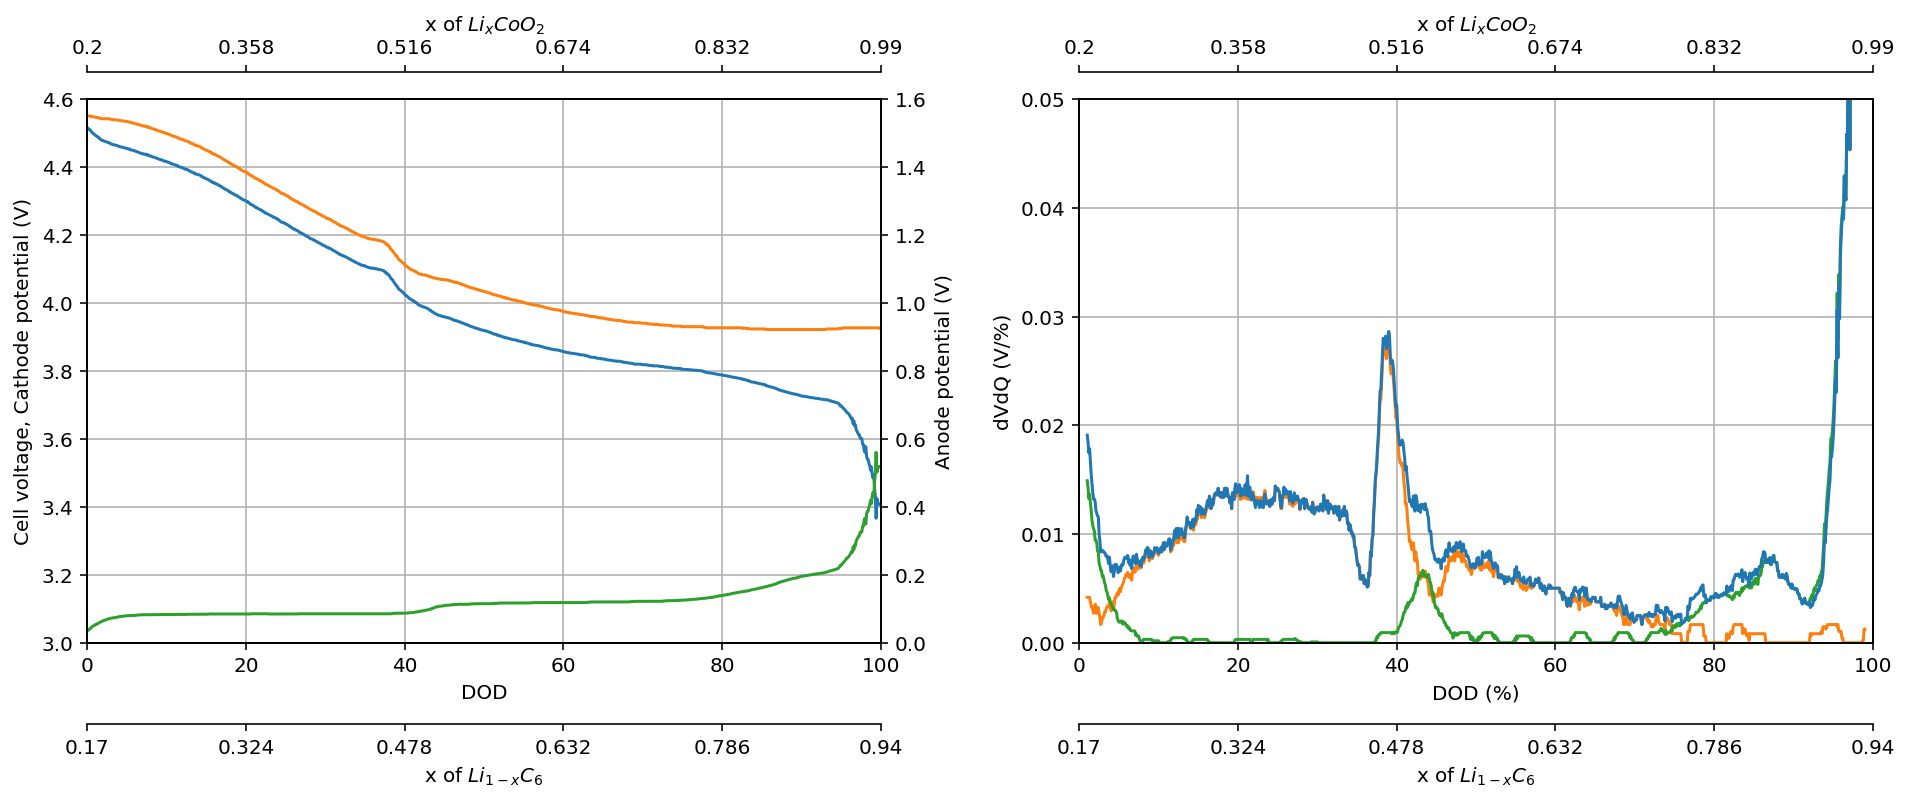

In [16]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.25)
ax2 = ax1.twinx()
ax1.plot(df_cell['DOD'], df_cell['Cathode OCV (V)'], color = new_colors[1])
ax1.plot(df_cell['DOD'], df_cell['Cell OCV (V)'], color = new_colors[0])
ax1.set_ylabel('Cell voltage, Cathode potential (V)')
ax2.plot(df_cell['DOD'], df_cell['Anode OCV (V)'], color = new_colors[2])
ax2.set_ylabel('Anode potential (V)')
ax1.set_xlabel('DOD')

ax1.set_ylim([3, 4.6])
ax2.set_ylim([0, 1.6])
ax1.grid()

ax1.set_xlim([0,100])
ax4 = ax1.twiny()
ax4.xaxis.set_ticks_position("bottom")
ax4.xaxis.set_label_position("bottom")
ax4.spines["bottom"].set_position(("axes", -0.15))

ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.spines["bottom"].set_visible(True)
ax4.set_xticks([0,20,40,60,80,100])
ax4.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_n_s, x_n_e))
ax4.set_xlabel("x of $Li_{1-x}C_6$")


ax5 = ax1.twiny()
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.spines["top"].set_position(("axes", +1.05))

ax5.set_frame_on(True)
ax5.patch.set_visible(False)
ax5.spines["top"].set_visible(True)
ax5.set_xticks([0,20,40,60,80,100])
ax5.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_p_s, x_p_e))
ax5.set_xlabel("x of $Li_{x}CoO_2$")



ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Cathode OCV (V)'], 10), color = new_colors[1])
ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Anode OCV (V)'], 10), color = new_colors[2])
ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Cell OCV (V)'], 10), color = new_colors[0])


ax3.set_ylabel('dVdQ (V/%)')
ax3.set_xlabel('DOD (%)')

ax3.set_ylim([0, 0.05])
ax3.grid(which='both')

ax3.set_xlim([0,100])
ax6 = ax3.twiny()
ax6.xaxis.set_ticks_position("bottom")
ax6.xaxis.set_label_position("bottom")
ax6.spines["bottom"].set_position(("axes", -0.15))

ax6.set_frame_on(True)
ax6.patch.set_visible(False)
ax6.spines["bottom"].set_visible(True)
ax6.set_xticks([0,20,40,60,80,100])
ax6.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_n_s, x_n_e))
ax6.set_xlabel("x of $Li_{1-x}C_6$")


ax7 = ax3.twiny()
ax7.xaxis.set_ticks_position("top")
ax7.xaxis.set_label_position("top")
ax7.spines["top"].set_position(("axes", +1.05))

ax7.set_frame_on(True)
ax7.patch.set_visible(False)
ax7.spines["top"].set_visible(True)
ax7.set_xticks([0,20,40,60,80,100])
ax7.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_p_s, x_p_e))
ax7.set_xlabel("x of $Li_{x}CoO_2$")


plt.show()


## Diffuion in solid phase

Fick'S second law
\begin{eqnarray*}
\frac{\partial C_s(x,t)}{\partial t} = D_s\frac{\partial^2 C_s(x,t)}{\partial x^2}
\end{eqnarray*}
Boundary condition and initial condition
\begin{eqnarray*}
\frac{\partial C_s(x=0,t)}{\partial t} = 0\\
\frac{\partial C_s(x=R_s,t)}{\partial t} = j(t)\\
C_s(x,t=0)=C_{s,0}
\end{eqnarray*}

In [17]:
#Temperature
T = 298#[K]
temp_0 = 23 + 273.15#[K]


#Constant
R = 8.3144598 #[J/(mol K)]
F = 96485.33289 #[C/mol]
z = 1
alpha=0.5

k_o_p = 2.344E-11#7.13E-8
k_o_n = 5.0307E-11#1.47E-7
C_e_0 = 1000#[mol/m3]
C_s_max_p = 2.39E4 #[mol/m3]
C_s_max_n = 1.61E4 #[mol/m3]
C_s_p_0 = C_s_max_p*df_cell['Cathode x (-)'][0]
C_s_n_0 = C_s_max_n*(1 - df_cell['Anode x (-)'][0])

epsilon_e = 0.724
brugg_e = 4

#Area Dimension
S_Al = 100E-6*150E-6 #[m2]
S_Cu = 100E-6*200E-6 #[m2]
S_el = 150E-6*150E-6 #[m2]
S_p = 100E-6*100E-6  #[m2]
S_n = 100E-6*100E-6  #[m2]

#Cathode Dimension
L_Al = 100E-6 #[m]
L_p = 100E-6 #[m]

#Electrolyte Dimension
L_el = 100E-6 #[m]

#Anode Dimension
L_n = ((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*S_p*L_p*F)/((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*S_n*F)
L_Cu = 100E-6 #[m]

#1C Current
I = 6.4E-7#[A = C/sec]

#0.05C Current density
j_Al = I/S_Al*0.05  #(0.05ItA)[A/m2 = C/sec m2]
j_Cu = I/S_Cu*0.05  #(0.05ItA)[A/m2 = C/sec m2]
j_p = I/S_p*0.05    #(0.05ItA)[A/m2 = C/sec m2]
j_n = I/S_n*0.05    #(0.05ItA)[A/m2 = C/sec m2]
j_el = I/S_el*0.05  #(0.05ItA)[A/m2 = C/sec m2]

# Charge or Discharge
Condition = 'Discharge'
if Condition == 'Charge':
    j = abs(j)*(-1)

#Diffusion coefficient
D_p = 1.0E-12 #[m2/s]
D_n = 2.0E-12 #[m2/s]



In [18]:
L_n*1E6

152.50553881129881

In [19]:
# Memo
# C = C/sec sec = A sec
# C*60*60 = Ah

In [20]:
# Cathode capacity
print((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*S_p*L_p*F) # [C]
print((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*S_p*L_p*F/3600) # [C/sec * sec /36000 = A sec /36000 =Ah ]
Full_cap = (max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*S_p*L_p*F/3600 #Ah

0.00182093247049
5.05814575135e-07


In [21]:
# Anode capacity
print((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*S_n*L_n*F) # [C]
print((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*S_n*L_n*F/3600) # [C/sec * sec /36000 = A sec /36000 =Ah ]

0.00182093247049
5.05814575135e-07


In [22]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 10
dx = L_p/n

t_total = 60*60*20 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_p - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_s_p_0*S_p
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(j_p*S_p/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
1.9e+01 sec


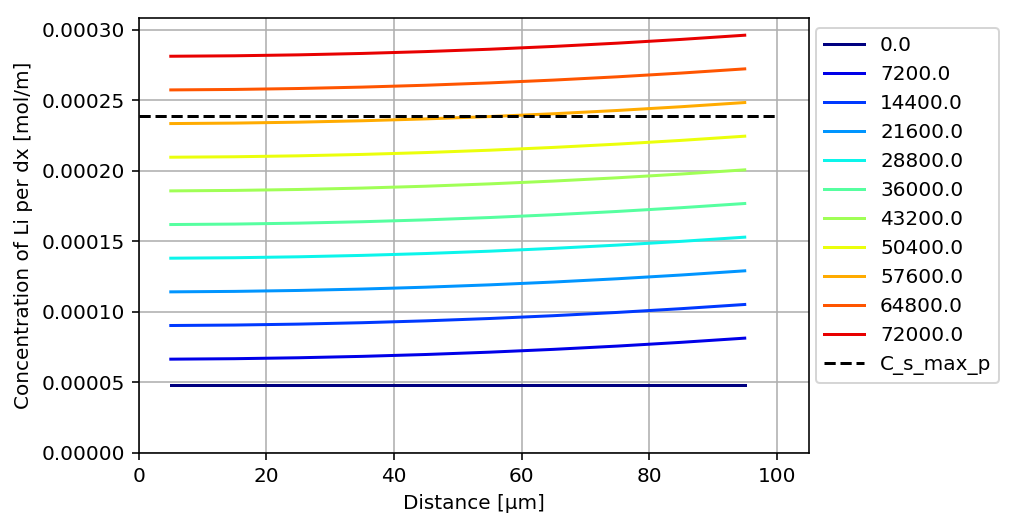

In [23]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.plot(([0,100]),([C_s_max_p*S_p,C_s_max_p*S_p]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

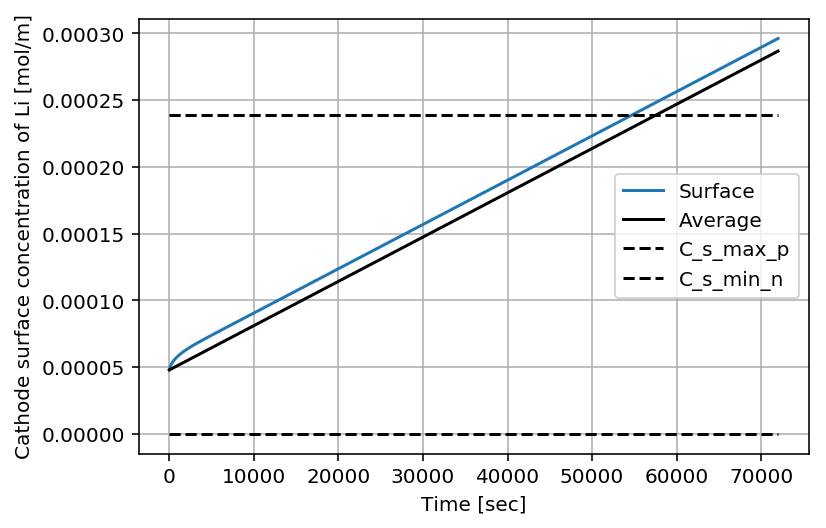

In [24]:
plt.plot(time_rlt,C_rlt[:,-1], label='Surface')
plt.plot(([0,t_total]), ([sum(C_rlt[0,:])/n, sum(C_rlt[-1,:])/n]), color = 'black', label='Average')
plt.plot(([0,t_total]),([C_s_max_p*S_p,C_s_max_p*S_p]),'--',label='C_s_max_p',color='black')
plt.plot(([0,t_total]),([0, 0]),'--',label='C_s_min_n',color='black')
plt.ylabel('Cathode surface concentration of Li [mol/m]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Convert concentration to x stoichiometric ratio of cathode.
slr_p = LinearRegression()
X_p = np.array([sum(C_rlt[0,:])/n/S_p, 0])
y_p = np.array([min(df_cell['Cathode x (-)']), 0])
X_p = X_p.reshape(-1, 1)
y_p = y_p.reshape(-1, 1)
slr_p.fit(X_p, y_p)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 16
dx = L_n/n

t_total = 60*60*20 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_n - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_s_n_0*S_n
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt_n = np.zeros(len(t)+1)
x_rlt_n = np.zeros((len(t)+1,len(x)))
C_rlt_n = np.zeros((len(t)+1,len(C)))

x_rlt_n[0] = x
C_rlt_n[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_n*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_n*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_n*(-j_n*S_n/F/D_n - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt_n[jj] = (jj)*dt
    x_rlt_n[jj] = x #
    C_rlt_n[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
2.9e+01 sec


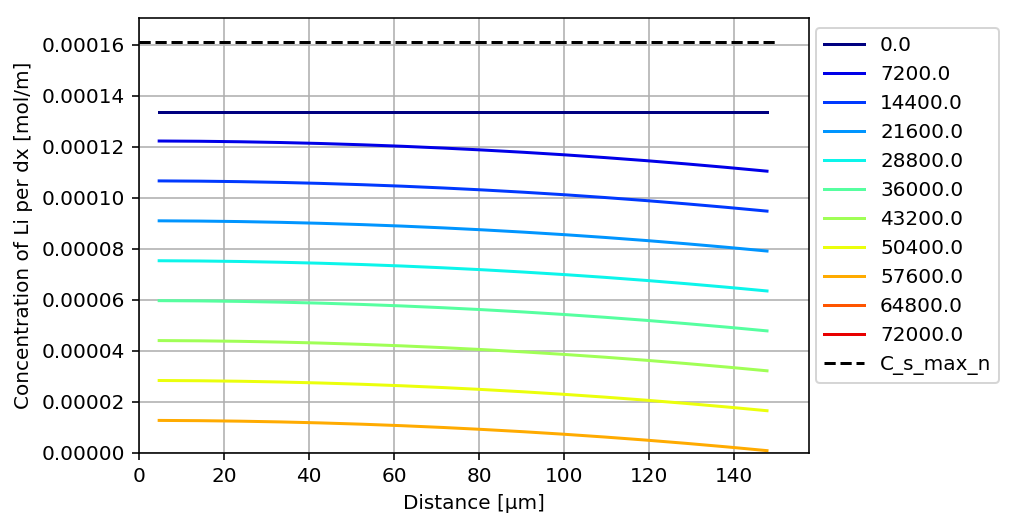

In [27]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt_n[time_rlt_n % tt == 0])):
    plt.plot(x_rlt_n[time_rlt_n % tt == 0][ii]*1E6,C_rlt_n[time_rlt_n % tt == 0][ii], label = time_rlt_n[time_rlt_n % tt == 0][ii],color=cm.jet(ii/len(time_rlt_n[time_rlt_n % tt == 0])))
plt.plot(([0,150]),([C_s_max_n*S_n,C_s_max_n*S_n]),'--',label='C_s_max_n',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

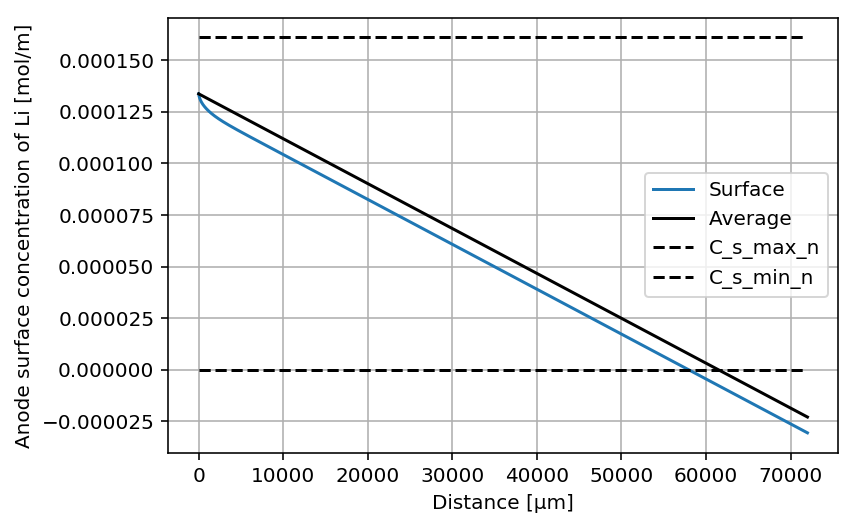

In [28]:
plt.plot(time_rlt_n,C_rlt_n[:,-1], label='Surface')
plt.plot(([0,t_total]), ([sum(C_rlt_n[0,:])/n, sum(C_rlt_n[-1,:])/n]), color = 'black', label='Average')
plt.plot(([0,t_total]),([C_s_max_n*S_n,C_s_max_n*S_n]),'--',label='C_s_max_n',color='black')
plt.plot(([0,t_total]),([0, 0]),'--',label='C_s_min_n',color='black')
plt.ylabel('Anode surface concentration of Li [mol/m]')
plt.xlabel('Distance [μm]')
plt.legend()
plt.grid()
plt.show()

In [29]:
# Convert concentration to x stoichiometric ratio of anode.
slr_n = LinearRegression()
X_n = np.array([sum(C_rlt_n[0,:])/n/S_n, 0])
y_n = np.array([min(df_cell['Anode x (-)']), 1])
X_n = X_n.reshape(-1, 1)
y_n = y_n.reshape(-1, 1)
slr_n.fit(X_n, y_n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
df_sim = pd.DataFrame(time_rlt)
df_sim.columns = ['Time (sec)']
df_sim['C_s_p_surface (mol/m3)'] = C_rlt[:,-1]/S_p # Li concentration at the surface of positive electrode material
df_sim['C_s_n_surface (mol/m3)'] = C_rlt_n[:,-1]/S_n # Li concentration at the surface of positive electrode material

df_sim['Cathode x of surface (-)'] = slr_p.predict(np.array(df_sim['C_s_p_surface (mol/m3)']).reshape(-1, 1))
df_sim['Anode x of surface (-)'] = slr_n.predict(np.array(df_sim['C_s_n_surface (mol/m3)']).reshape(-1, 1))
df_sim['Cathode current density (A/m2)'] = j_p
df_sim['Anode current density (A/m2)'] = j_n
df_sim['Cathode capacity (Ah)'] = df_sim['Time (sec)'] * df_sim['Cathode current density (A/m2)']*S_p/(60*60)
df_sim['Anode capacity (Ah)'] = df_sim['Time (sec)'] * df_sim['Anode current density (A/m2)']*S_n/(60*60)

if max((df_sim['Cathode capacity (Ah)'] - df_sim['Anode capacity (Ah)'])**2) == 0:
    print('OK')
else:
    raise Exception('Error!, Capacity calculated from cathode and that from anode is not coincident.')

df_sim['DOD'] = df_sim['Cathode capacity (Ah)']/Full_cap*100


df_sim = pd.merge_asof(df_sim, df_LCO_OCV, on='DOD', direction='nearest')
df_sim = pd.merge_asof(df_sim, df_LiC6_OCV, on='DOD', direction='nearest')
df_sim.columns = ['Time (sec)', 'C_s_p_surface (mol/m3)', 'C_s_n_surface (mol/m3)','Cathode x of surface (-)','Anode x of surface (-)', 'Cathode current density (A/m2)', 'Anode current density (A/m2)', 'Cathode capacity (Ah)', 'Anode capacity (Ah)', 'DOD (%)', 'Cathode x (-)', 'Cathode OCV (V)', 'Anode x (-)', 'Anode OCV (V)']
df_sim['Cell OCV (V)'] = (df_sim['Cathode OCV (V)']  - df_sim['Anode OCV (V)'])

df_tmp = df_LCO_OCV[['x', 'Potential(V)']]
df_tmp.columns = ['Cathode x of surface (-)','Cathode surface OCV (V)']
df_sim = pd.merge_asof(df_sim, df_tmp, on='Cathode x of surface (-)', direction='nearest')
df_tmp = df_LiC6_OCV[['x', 'Potential(V)']]
df_tmp.columns = ['Anode x of surface (-)','Anode surface OCV (V)']
df_sim = pd.merge_asof(df_sim.sort_values('Anode x of surface (-)') , df_tmp, on='Anode x of surface (-)', direction='nearest')
df_sim = df_sim.sort_values('Time (sec)').reset_index(drop=True)
df_sim = df_sim[df_sim['C_s_p_surface (mol/m3)'] <= C_s_max_p]
df_sim = df_sim[df_sim['Anode x of surface (-)'] <= max(df_LiC6_OCV['x'])]
df_sim


OK


,Time (sec),C_s_p_surface (mol/m3),C_s_n_surface (mol/m3),Cathode x of surface (-),Anode x of surface (-),Cathode current density (A/m2),Anode current density (A/m2),Cathode capacity (Ah),Anode capacity (Ah),DOD (%),Cathode x (-),Cathode OCV (V),Anode x (-),Anode OCV (V),Cell OCV (V),Cathode surface OCV (V),Anode surface OCV (V)
0,0.00,4787.648000,13368.948882,0.200320,0.169631,3.2,3.2,0.000000e+00,0.000000e+00,0.000000,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
1,0.05,4787.813828,13368.774905,0.200327,0.169641,3.2,3.2,4.444444e-13,4.444444e-13,0.000088,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
2,0.10,4787.979574,13368.601119,0.200334,0.169652,3.2,3.2,8.888889e-13,8.888889e-13,0.000176,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
3,0.15,4788.145236,13368.427524,0.200341,0.169663,3.2,3.2,1.333333e-12,1.333333e-12,0.000264,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
4,0.20,4788.310816,13368.254119,0.200348,0.169674,3.2,3.2,1.777778e-12,1.777778e-12,0.000351,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067669,53383.45,23437.844316,993.943660,0.980663,0.938264,3.2,3.2,4.745196e-07,4.745196e-07,93.812946,0.94084,3.92363,0.892450,0.212631,3.710999,3.92698,0.520155
1067670,53383.50,23437.860899,993.932786,0.980664,0.938265,3.2,3.2,4.745200e-07,4.745200e-07,93.813034,0.94084,3.92363,0.892450,0.212631,3.710999,3.92698,0.520155
1067671,53383.55,23437.877482,993.921913,0.980664,0.938266,3.2,3.2,4.745204e-07,4.745204e-07,93.813122,0.94084,3.92363,0.892450,0.212631,3.710999,3.92698,0.518913
1067672,53383.60,23437.894064,993.911039,0.980665,0.938266,3.2,3.2,4.745209e-07,4.745209e-07,93.813210,0.94084,3.92363,0.892450,0.212631,3.710999,3.92698,0.518913


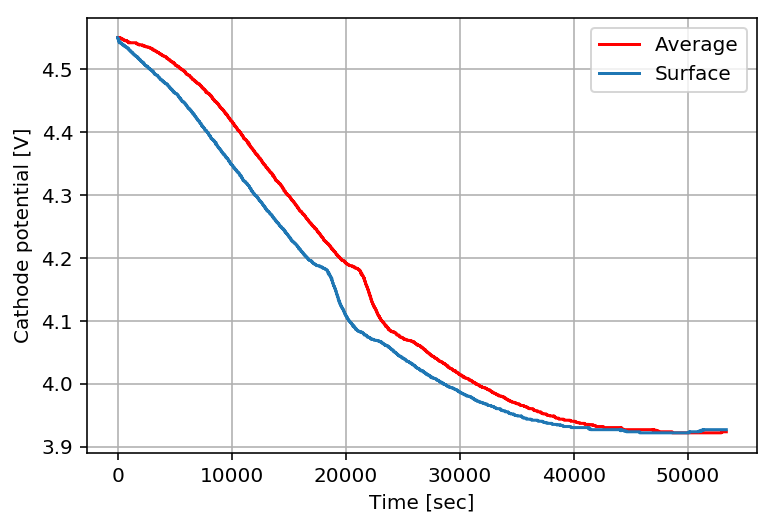

In [38]:
plt.plot(df_sim['Time (sec)'], df_sim['Cathode OCV (V)'], color = 'r', label='Average')
plt.plot(df_sim['Time (sec)'], df_sim['Cathode surface OCV (V)'], label='Surface')
plt.ylabel('Cathode potential [V]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

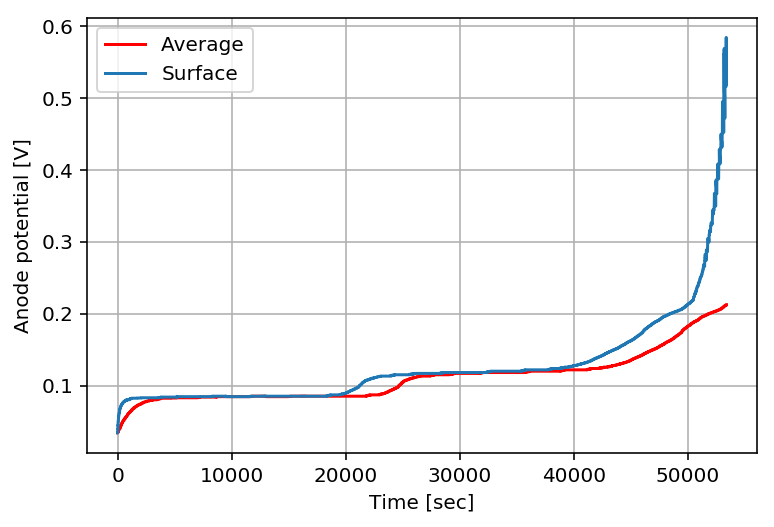

In [39]:
plt.plot(df_sim['Time (sec)'], df_sim['Anode OCV (V)'], color = 'r', label='Average')
plt.plot(df_sim['Time (sec)'], df_sim['Anode surface OCV (V)'], label='Surface')
plt.ylabel('Anode potential [V]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

## Li ion concentration in Liquid phase (Electrolyte)

<img src="NernstPlanck.png" width='400'>

In [40]:
epsilon = 1
Deff = 7.5E-11 #[m2/sec]
t_plus = 0.363

In [46]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*20/100 #[sec] run time
dt = 0.005 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)
    #dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx - j*S/F/Deff)/dx + (1-t_plus)/F*j*S)
    #dCdt[n-1] = 1/epsilon*(Deff*(j*S/F/Deff - (C[n-1] - C[n-2])/dx)/dx + (1-t_plus)/F*j*S)
                                 
    #dCdt[0] = D_n*((C[1] - C[0])/dx)/dx
    #dCdt[n-1] = D_n*(-j*S/F/D_n - (C[n-1] - C[n-2])/dx)/dx
    
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
4.0 sec


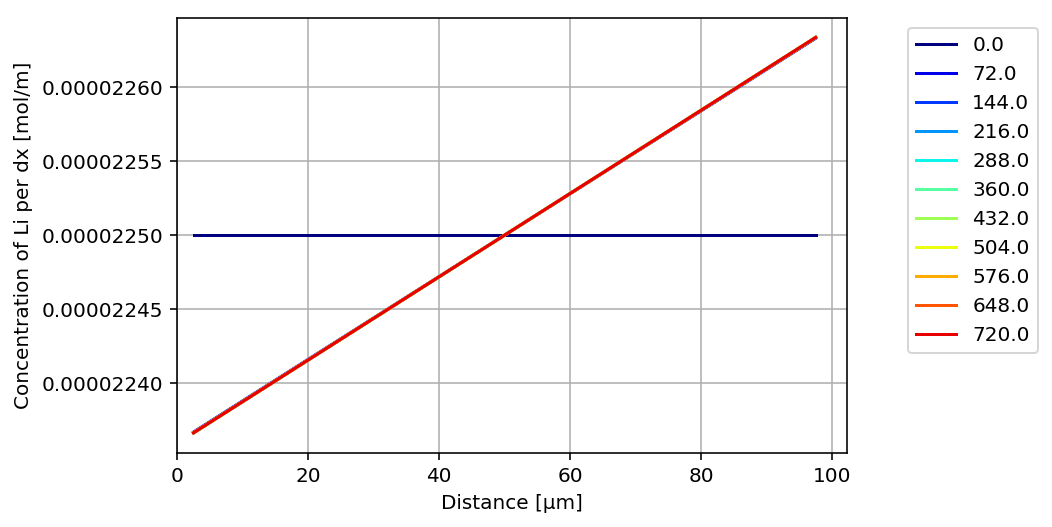

In [47]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
#plt.plot(([0,100]),([C_s_max_p*S,C_s_max_p*S]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
#plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [48]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*20/100 #[sec] run time
dt = 0.005 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)
    #dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx - j*S/F/Deff)/dx + (1-t_plus)/F*j*S)
    #dCdt[n-1] = 1/epsilon*(Deff*(j*S/F/Deff - (C[n-1] - C[n-2])/dx)/dx + (1-t_plus)/F*j*S)
                                 
    #dCdt[0] = D_n*((C[1] - C[0])/dx)/dx
    #dCdt[n-1] = D_n*(-j*S/F/D_n - (C[n-1] - C[n-2])/dx)/dx
    
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
3.9 sec


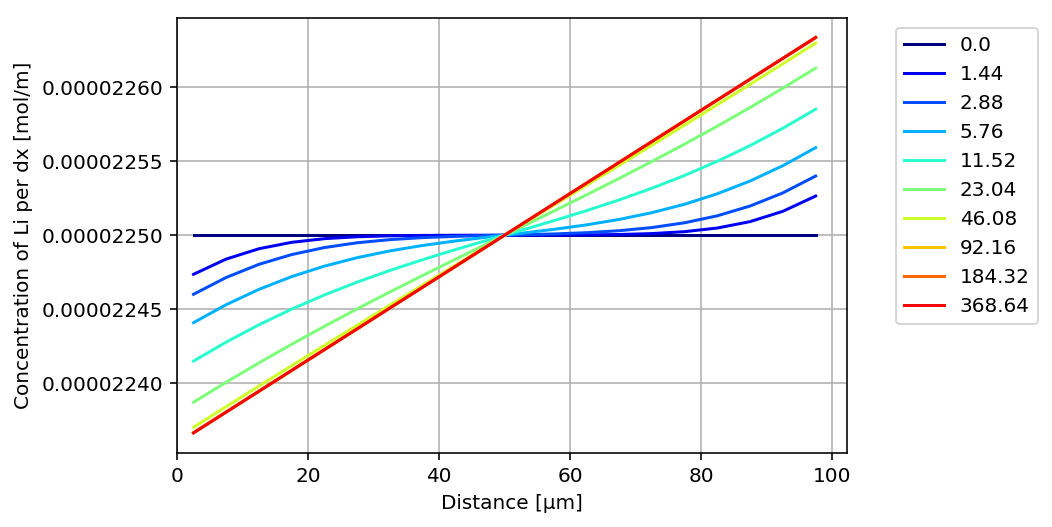

In [49]:
tt=(t_total-dt)/500#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
#plt.plot(([0,100]),([C_s_max_p*S,C_s_max_p*S]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
#plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [50]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*20 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)
    #dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx - j*S/F/Deff)/dx + (1-t_plus)/F*j*S)
    #dCdt[n-1] = 1/epsilon*(Deff*(j*S/F/Deff - (C[n-1] - C[n-2])/dx)/dx + (1-t_plus)/F*j*S)
                                 
    #dCdt[0] = D_n*((C[1] - C[0])/dx)/dx
    #dCdt[n-1] = D_n*(-j*S/F/D_n - (C[n-1] - C[n-2])/dx)/dx
    
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
3.9e+01 sec


In [51]:
np.array([0,len(time_rlt)])

array([      0, 1440002])

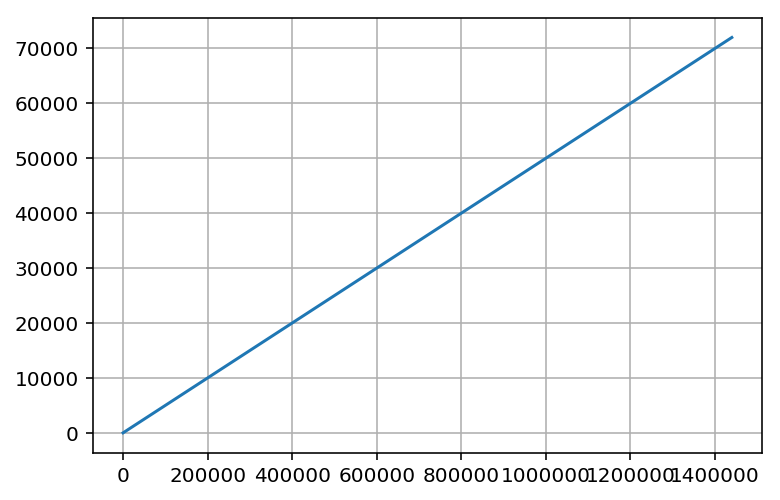

In [53]:
plt.plot(np.array(range(len(time_rlt))),time_rlt)
plt.grid()
plt.show()

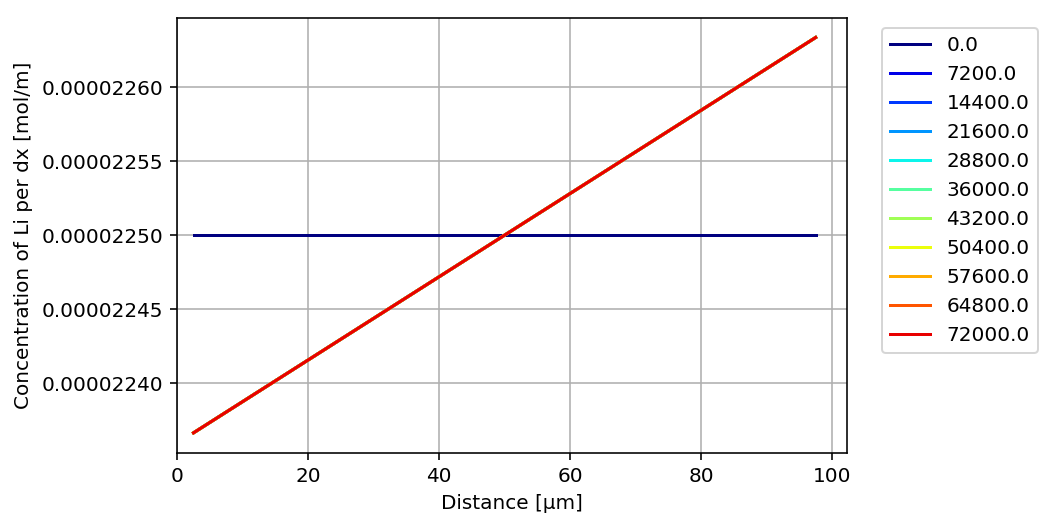

In [54]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
#plt.plot(([0,100]),([C_s_max_p*S,C_s_max_p*S]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
#plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [55]:
np.shape(C_rlt)

(1440002, 20)

In [56]:
np.shape(x_rlt)

(1440002, 20)

In [57]:
np.shape(time_rlt)

(1440002,)

In [58]:
np.shape(C_rlt.reshape(-1))

(28800040,)

In [59]:
np.shape(np.array([time_rlt]*len(C_rlt[0][:])).reshape(-1))

(28800040,)

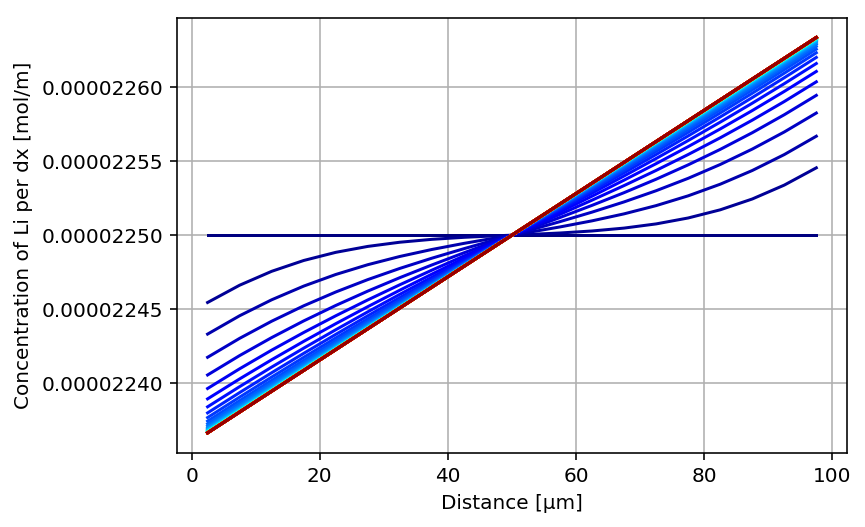

In [63]:
for ii in range(50):
    plt.plot(x_rlt[72*ii][:]*1E6, C_rlt[72*ii][:],color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

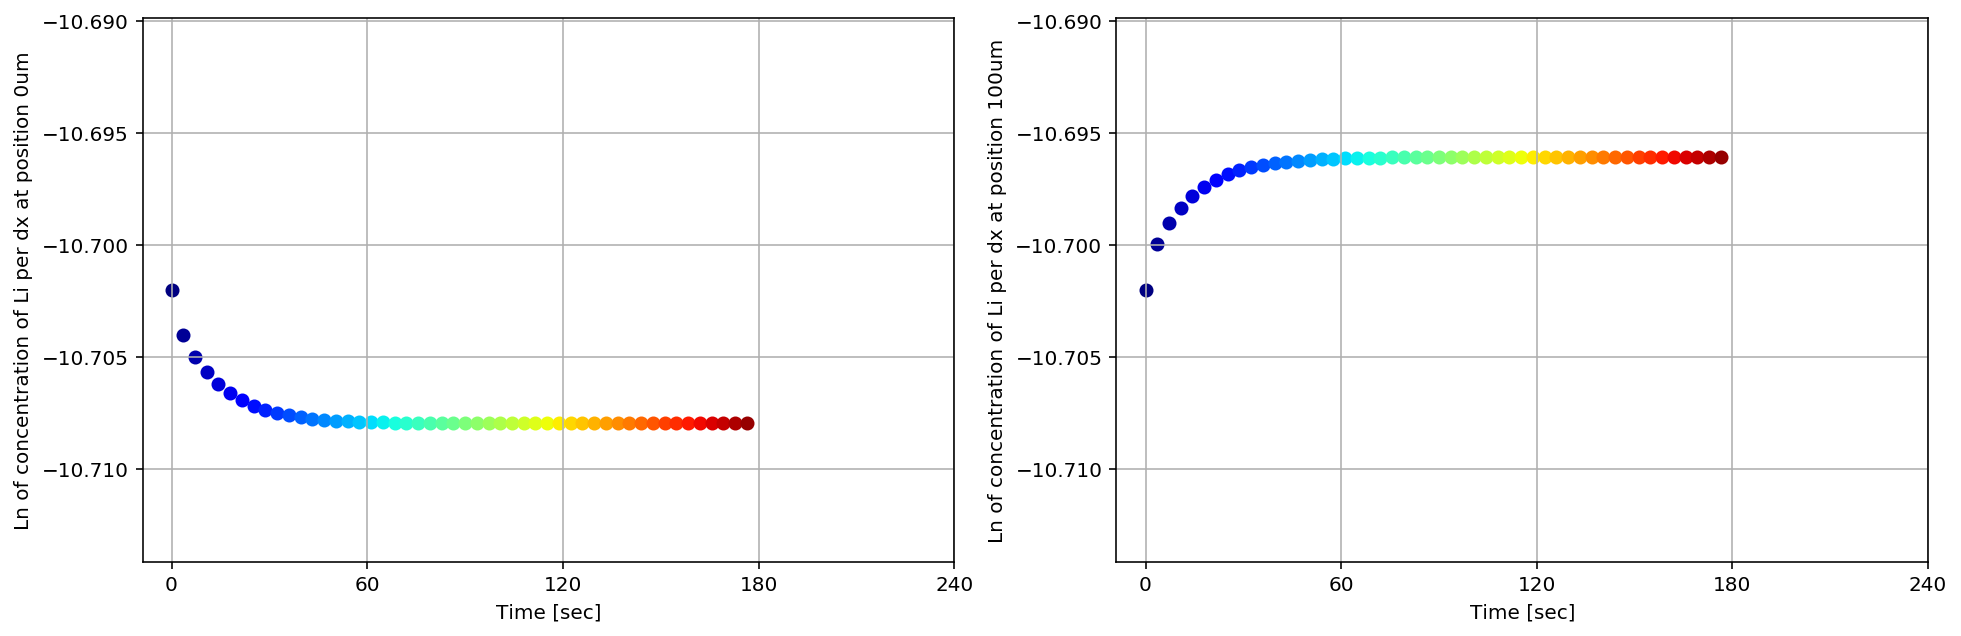

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

for ii in range(50):
    ax1.scatter(time_rlt[72*ii], np.log(C_rlt[72*ii][0]),color=cm.jet(ii/50), label='Average')
    ax2.scatter(time_rlt[72*ii], np.log(C_rlt[72*ii][19]),color=cm.jet(ii/50), label='Average')
ax1.grid()
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Ln of concentration of Li per dx at position 0um')
ax1.xaxis.set_ticks(np.arange(0, 300, 60))
ax2.grid()
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Ln of concentration of Li per dx at position 100um')
ax2.xaxis.set_ticks(np.arange(0, 300, 60))
plt.show()

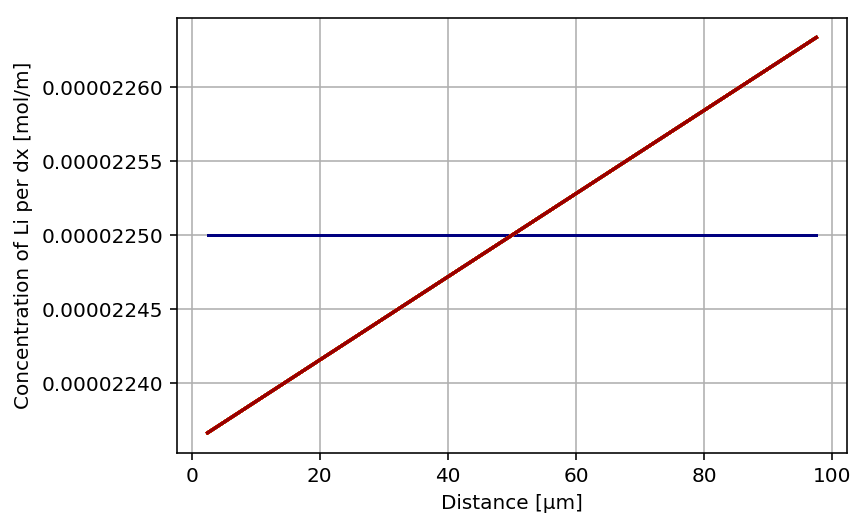

In [65]:
for ii in range(50):
    plt.plot(x_rlt[28800*ii][:]*1e6, C_rlt[28800*ii][:],color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

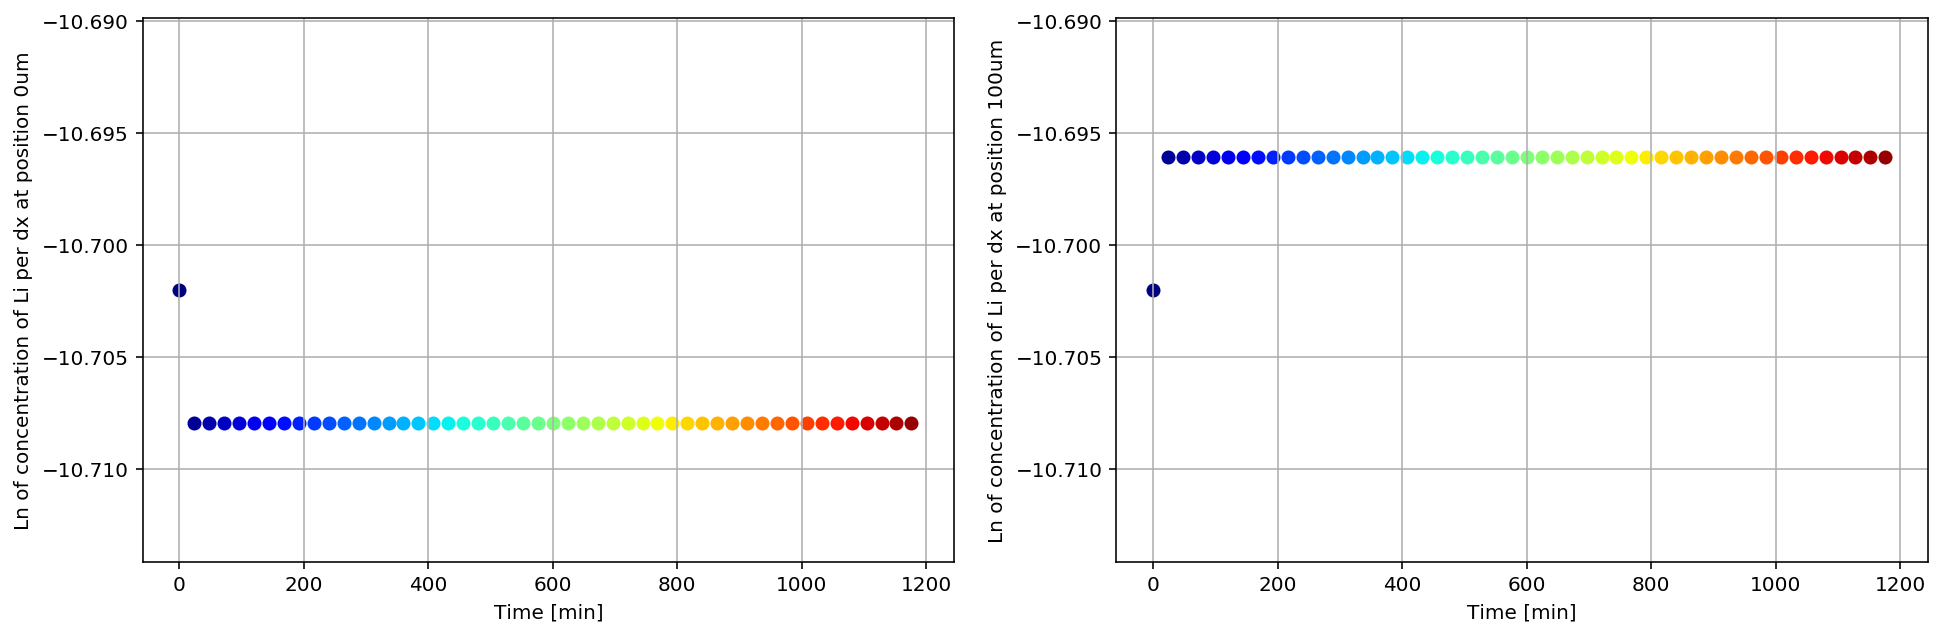

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

for ii in range(50):
    ax1.scatter(time_rlt[28800*ii]/60, np.log(C_rlt[28800*ii][0]),color=cm.jet(ii/50), label='Average')
    ax2.scatter(time_rlt[28800*ii]/60, np.log(C_rlt[28800*ii][19]),color=cm.jet(ii/50), label='Average')
ax1.grid()
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Ln of concentration of Li per dx at position 0um')
#ax1.xaxis.set_ticks(np.arange(0, 1300, 100))
ax2.grid()
ax2.set_xlabel('Time [min]')
ax2.set_ylabel('Ln of concentration of Li per dx at position 100um')
#ax2.xaxis.set_ticks(np.arange(0, 1300, 100))
plt.show()

In [457]:
72000/60

1200.0

## Concentraion overpotential in electrolyte
\begin{eqnarray*}
\frac{2RT}{F}(0.5-t_+)(\ln{c_{e,k}}(x) -\ln{c_{e,k}}(x=0))
\end{eqnarray*}

In [67]:
2*R*T/F*(0.5-t_plus)

0.007036222514395888

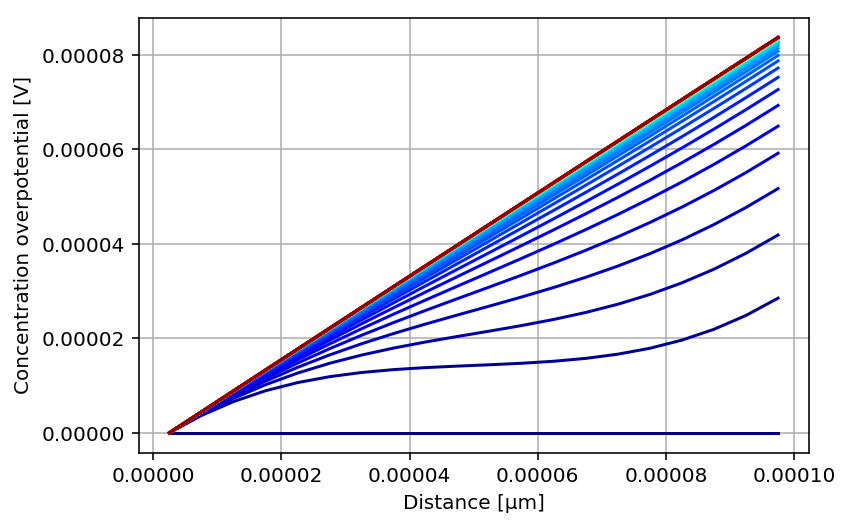

In [68]:
for ii in range(50):
    plt.plot(x_rlt[72*ii][:], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[72*ii][:])-np.log(C_rlt[72*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

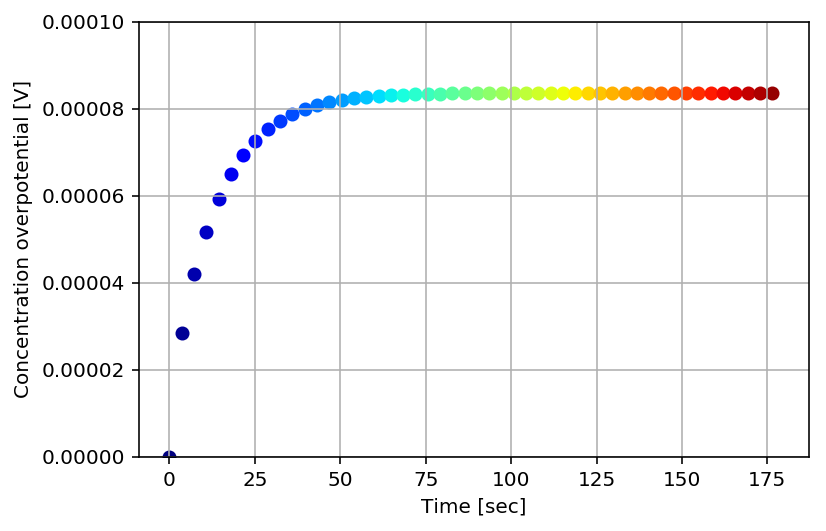

In [75]:
for ii in range(50):
    plt.scatter(time_rlt[72*ii], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[72*ii][19])-np.log(C_rlt[72*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.ylim(0,0.0001)
plt.xlabel('Time [sec]')
plt.grid()
plt.show()

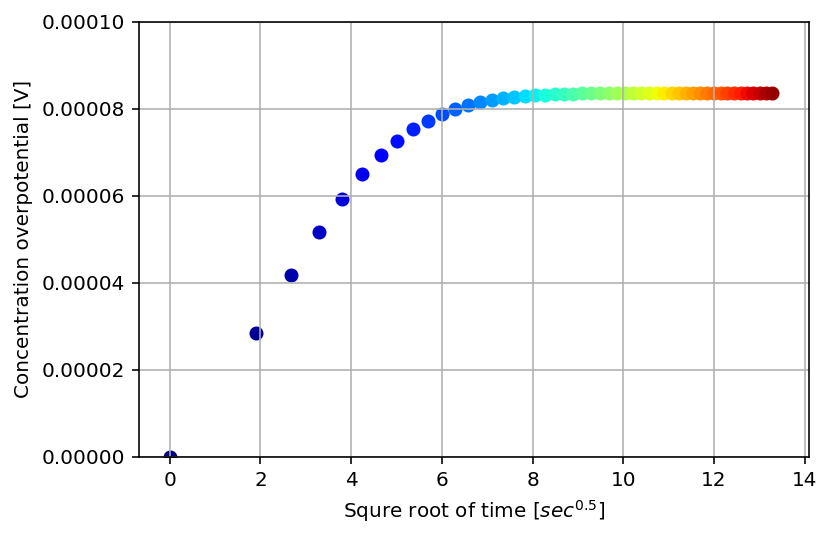

In [76]:
for ii in range(50):
    plt.scatter(np.sqrt(time_rlt[72*ii]), 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[72*ii][19])-np.log(C_rlt[72*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.ylim(0,0.0001)
plt.xlabel('Squre root of time [$sec^{0.5}$]')
plt.grid()
plt.show()

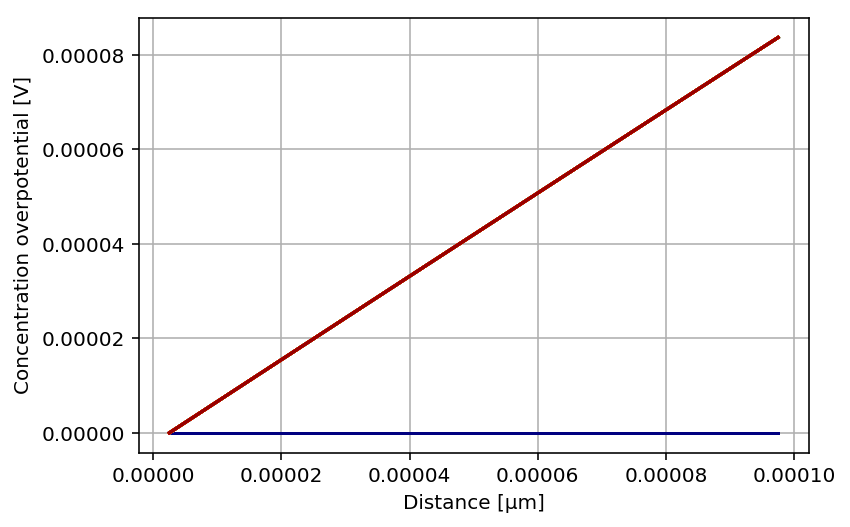

In [77]:
for ii in range(50):
    plt.plot(x_rlt[28800*ii][:], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[28800*ii][:])-np.log(C_rlt[28800*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

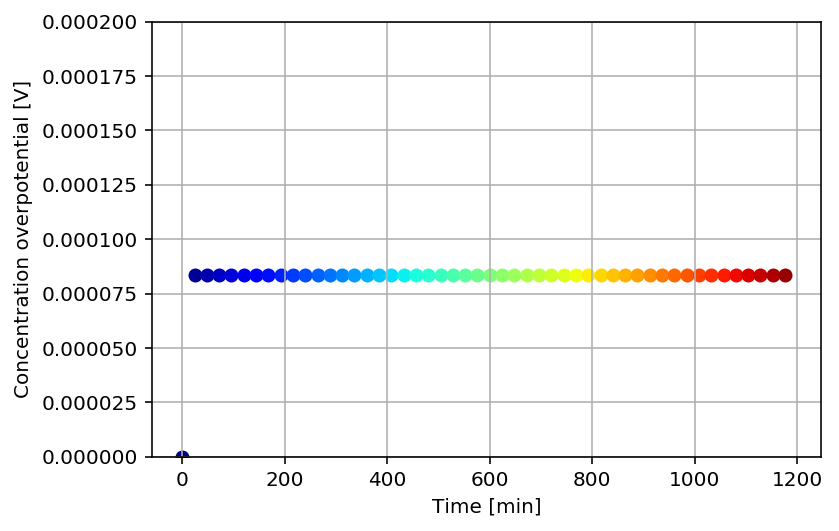

In [78]:
for ii in range(50):
    plt.scatter(time_rlt[28800*ii]/60, 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[28800*ii][19])-np.log(C_rlt[28800*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.ylim(0,0.0002)
plt.xlabel('Time [min]')
plt.grid()
plt.show()

## Migration overpotential in electrolyte
\begin{eqnarray*}
\Phi_{e,k}(x,t)=-\frac{x}{\kappa_{eff,k}}\frac{t_+I}{S}
\end{eqnarray*}

\begin{eqnarray*}
\kappa_{eff,k}(x,t)=\epsilon_k^{brugg_k}[4.1253 \times 10^{-2}+5.007 \times 10^{-4}c_{e,k}(x,t)
-4.7212\times10^{-7}c_{e,k}^2(x,t)+1.5094\times10^{-10}c_{e,k}^3(x,t)-1.6018\times10^{-14}c_{e,k}^4(x,t)]
\end{eqnarray*}
unit of $\kappa_{eff,k}$ is [S/m]

In [79]:
#Assume C_e,k as constant (initial concentration C_e_0 = 1000mol/m3)
kappa_e = epsilon_e**brugg_e*(4.1253*1E-2 + 5.007*1E-4*C_e_0 -4.7212*1E-7*C_e_0**2
                              + 1.5094*1E-10*C_e_0**3 - 1.6018*1E-14*C_e_0**4)
kappa_e

0.056258581872730876

In [80]:
#[S/cm]
kappa_e/100

0.0005625858187273087

\begin{eqnarray*}
\kappa=0.0158c_e exp(0.85c_e^{1.4}) [S/cm]
\end{eqnarray*}
[K. Smith, C.-Y. Wang / Journal of Power Sources 161 (2006) 628–639]

In [81]:
0.0158*C_e_0/1000000*np.exp(0.85*(C_e_0/1000000)**1.4)

1.5800847398437009e-05

電気伝導度の値が妥当かどうかは、別途検証する必要あり。

In [82]:
-L_el/kappa_e*t_plus*j_el

-0.0009176674019877964

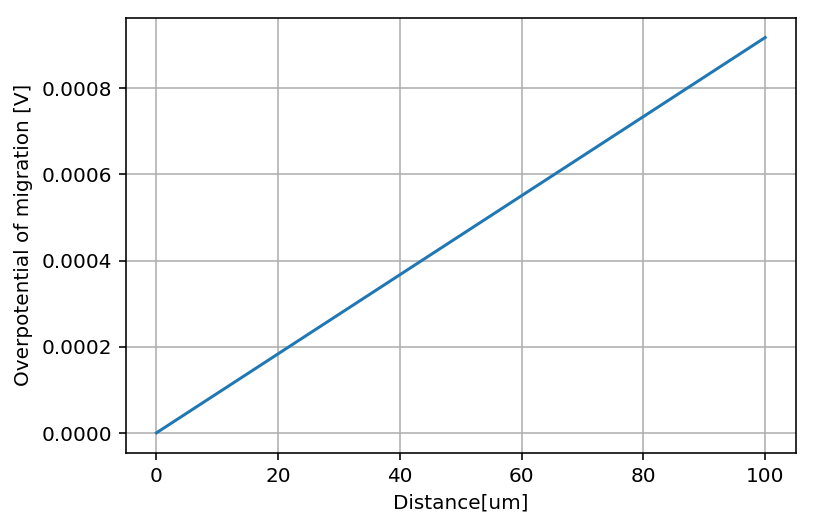

In [83]:
plt.plot([0,L_el*1E6], [0,-L_el/kappa_e*t_plus*(-j_el)])
plt.xlabel('Distance[um]')
plt.ylabel('Overpotential of migration [V]')
plt.grid()
plt.show()

## Overpotential by foil electronic resistance
\begin{eqnarray*}
\rho(T) = \rho_0[1+\alpha(T-T_0)]
\end{eqnarray*}

In [33]:
#resistivity at 294.15K (20deg.C)
rho_0_Al = 2.82E-8#[ohm m]
rho_0_Cu = 1.68E-8#[ohm m]
alpha_Al = 0.0039#[/K]
alpha_Cu = 0.003862#[/K]

In [34]:
#Overpotential by foil resistance
DV_Al = rho_0_Al * (1 + alpha_Al*(T - temp_0)) * Al_length / S *I
DV_Cu = rho_0_Cu * (1 + alpha_Cu*(T - temp_0)) * Cu_length / S *I
print(DV_Al)
print(DV_Cu)

1.8178216320000008e-10
1.0828819814400002e-10


In [35]:
df_sim['DV_Al'] = rho_0_Al * (1 + alpha_Al*(T - temp_0)) * Al_length / S *I
df_sim['DV_Cu'] = rho_0_Cu * (1 + alpha_Cu*(T - temp_0)) * Cu_length / S *I

## Overpotential by Butler-volmer equation

\begin{eqnarray*}
j = j_0 \left( \exp \left[\frac{\alpha_a zF\eta}{RT}\right] - \exp \left[-\frac{\alpha_c zF\eta}{RT}\right]\right)\\
j_0 = zFk^o(C_e)^{\alpha_a}(C_{s,max}-C_s)^{\alpha_a}(C_s)^{\alpha_c}
\end{eqnarray*}

\begin{eqnarray*}
\eta = \frac{RT}{\alpha zF}ln\left(\frac{j}{2j_0} + \sqrt{\left(\frac{j}{2j_0}\right)^2 + 1} \right)
\end{eqnarray*}

In [35]:
df_sim['j_0_p (A/m2)'] = z*F*k_o_p*C_e**alpha*(C_s_max_p - df_sim['C_s_p_surface (mol/m3)'])**alpha*(df_sim['C_s_p_surface (mol/m3)'])**alpha#[A/m2]
df_sim['j_0_n (A/m2)'] = z*F*k_o_n*C_e**alpha*(C_s_max_n - df_sim['C_s_n_surface (mol/m3)'])**alpha*(df_sim['C_s_n_surface (mol/m3)'])**alpha#[A/m2]
df_sim['DV_eta_p'] = (R*T)/(alpha*z*F)*np.log(df_sim['Current density (A/m2)']/(2*df_sim['j_0_p (A/m2)']) + ((df_sim['Current density (A/m2)']/(2*df_sim['j_0_p (A/m2)']))**2 + 1)**0.5)
df_sim['DV_eta_n'] = (R*T)/(alpha*z*F)*np.log(df_sim['Current density (A/m2)']/(2*df_sim['j_0_n (A/m2)']) + ((df_sim['Current density (A/m2)']/(2*df_sim['j_0_n (A/m2)']))**2 + 1)**0.5)
df_sim['Cathode CCV (V)'] = df_sim['Cathode surface OCV (V)']  - df_sim['DV_Al'] - df_sim['DV_eta_p']
df_sim['Anode CCV (V)'] = df_sim['Anode surface OCV (V)']  + df_sim['DV_Cu'] + df_sim['DV_eta_n']
df_sim['Cell CCV (V)'] = df_sim['Cathode CCV (V)'] - df_sim['Anode CCV (V)']
df_sim = df_sim.dropna()
df_sim

,Time (sec),C_s_p_surface (mol/m3),C_s_n_surface (mol/m3),Cathode x of surface (-),Anode x of surface (-),Current density (A/m2),Capacity (Ah),DOD (%),Cathode x (-),Cathode OCV (V),...,Anode surface OCV (V),DV_Al,DV_Cu,j_0_p (A/m2),j_0_n (A/m2),DV_eta_p,DV_eta_n,Cathode CCV (V),Anode CCV (V),Cell CCV (V)
0,0.0,4787.648000,13368.948882,0.200320,0.169631,3.2,0.000000e+00,0.000000,0.20032,4.55072,...,0.034329,1.817822e-10,1.082882e-10,0.684128,0.927477,0.081436,0.067460,4.469284,0.101789,4.367495
1,0.5,4789.306283,13367.209107,0.200389,0.169739,3.2,4.444444e-12,0.000879,0.20032,4.55072,...,0.034329,1.817822e-10,1.082882e-10,0.684216,0.927712,0.081430,0.067448,4.469290,0.101777,4.367513
2,1.0,4790.956275,13365.488482,0.200458,0.169845,3.2,8.888889e-12,0.001757,0.20032,4.55072,...,0.034329,1.817822e-10,1.082882e-10,0.684305,0.927945,0.081424,0.067437,4.469296,0.101766,4.367530
3,1.5,4792.598058,13363.786585,0.200527,0.169951,3.2,1.333333e-11,0.002636,0.20032,4.55072,...,0.034329,1.817822e-10,1.082882e-10,0.684392,0.928174,0.081418,0.067426,4.469302,0.101755,4.367547
4,2.0,4794.231715,13362.103006,0.200595,0.170056,3.2,1.777778e-11,0.003515,0.20032,4.55072,...,0.034329,1.817822e-10,1.082882e-10,0.684480,0.928401,0.081412,0.067415,4.469308,0.101744,4.367564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106763,53381.5,23437.197585,994.367730,0.980636,0.938238,3.2,4.745022e-07,93.809519,0.94084,3.92363,...,0.530096,1.817822e-10,1.082882e-10,0.235543,0.594885,0.134273,0.088103,3.792707,0.618199,3.174508
106764,53382.0,23437.363414,994.258994,0.980643,0.938245,3.2,4.745067e-07,93.810398,0.94084,3.92363,...,0.527611,1.817822e-10,1.082882e-10,0.235501,0.594854,0.134282,0.088106,3.792698,0.615716,3.176982
106765,53382.5,23437.529242,994.150258,0.980650,0.938252,3.2,4.745111e-07,93.811277,0.94084,3.92363,...,0.525126,1.817822e-10,1.082882e-10,0.235460,0.594824,0.134291,0.088108,3.792689,0.613234,3.179455
106766,53383.0,23437.695070,994.041522,0.980657,0.938258,3.2,4.745156e-07,93.812155,0.94084,3.92363,...,0.522640,1.817822e-10,1.082882e-10,0.235419,0.594793,0.134300,0.088111,3.792680,0.610751,3.181929


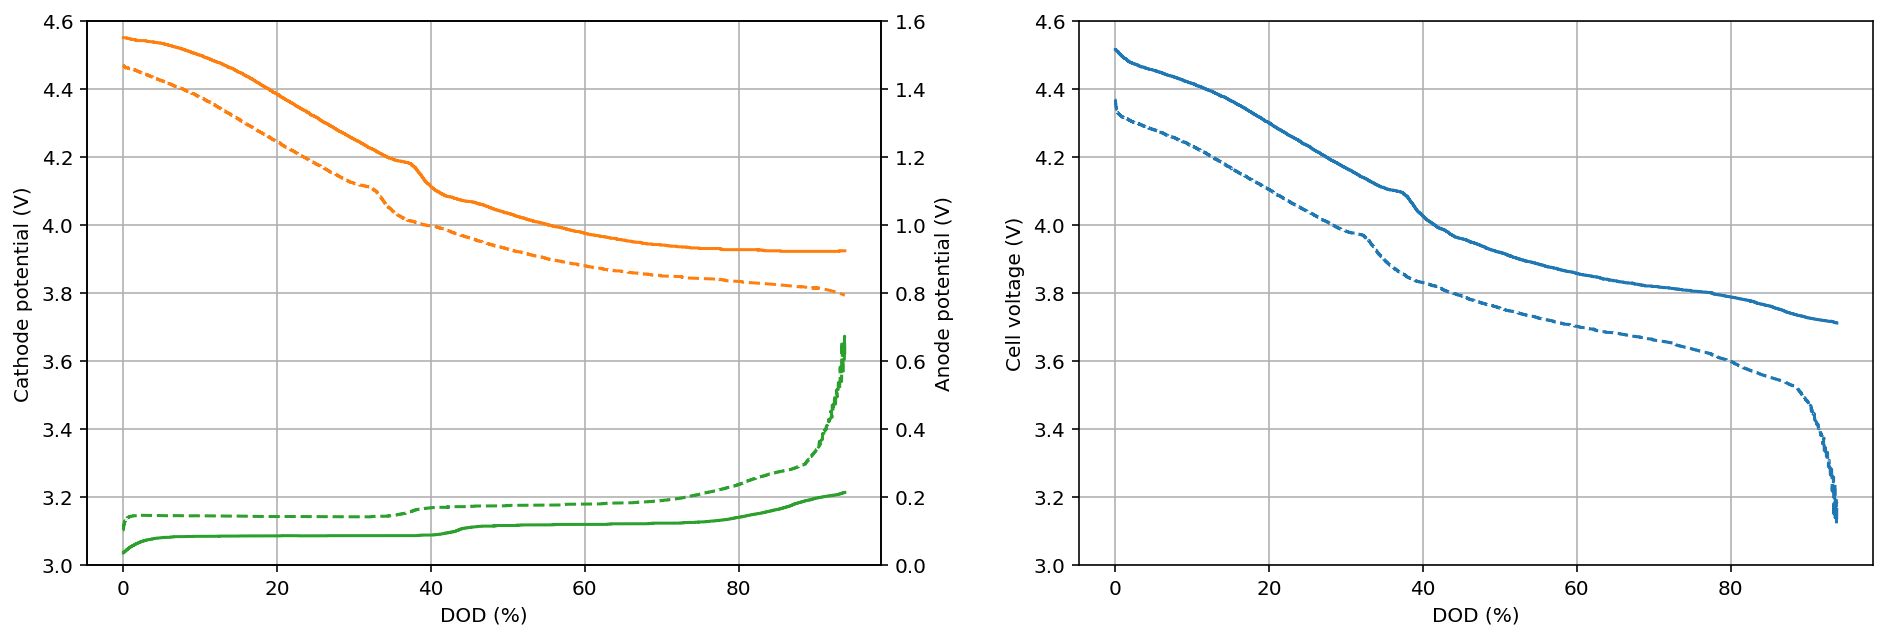

In [36]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.25)
ax2 = ax1.twinx()
ax1.plot(df_sim['DOD (%)'], df_sim['Cathode OCV (V)'], color = new_colors[1])
ax1.plot(df_sim['DOD (%)'], df_sim['Cathode CCV (V)'],'--', color = new_colors[1])
ax1.set_ylabel('Cathode potential (V)')
ax2.plot(df_sim['DOD (%)'], df_sim['Anode OCV (V)'], color = new_colors[2])
ax2.plot(df_sim['DOD (%)'], df_sim['Anode CCV (V)'],'--', color = new_colors[2])
ax2.set_ylabel('Anode potential (V)')
ax1.set_xlabel('DOD (%)')

ax1.set_ylim([3, 4.6])
ax2.set_ylim([0, 1.6])

ax1.grid()

ax3.plot(df_sim['DOD (%)'], df_sim['Cell OCV (V)'], color = new_colors[0])
ax3.plot(df_sim['DOD (%)'], df_sim['Cell CCV (V)'],'--', color = new_colors[0])
ax3.set_ylabel('Cell voltage (V)')
ax3.set_xlabel('DOD (%)')
ax3.set_ylim([3, 4.6])

ax3.grid()

plt.show()

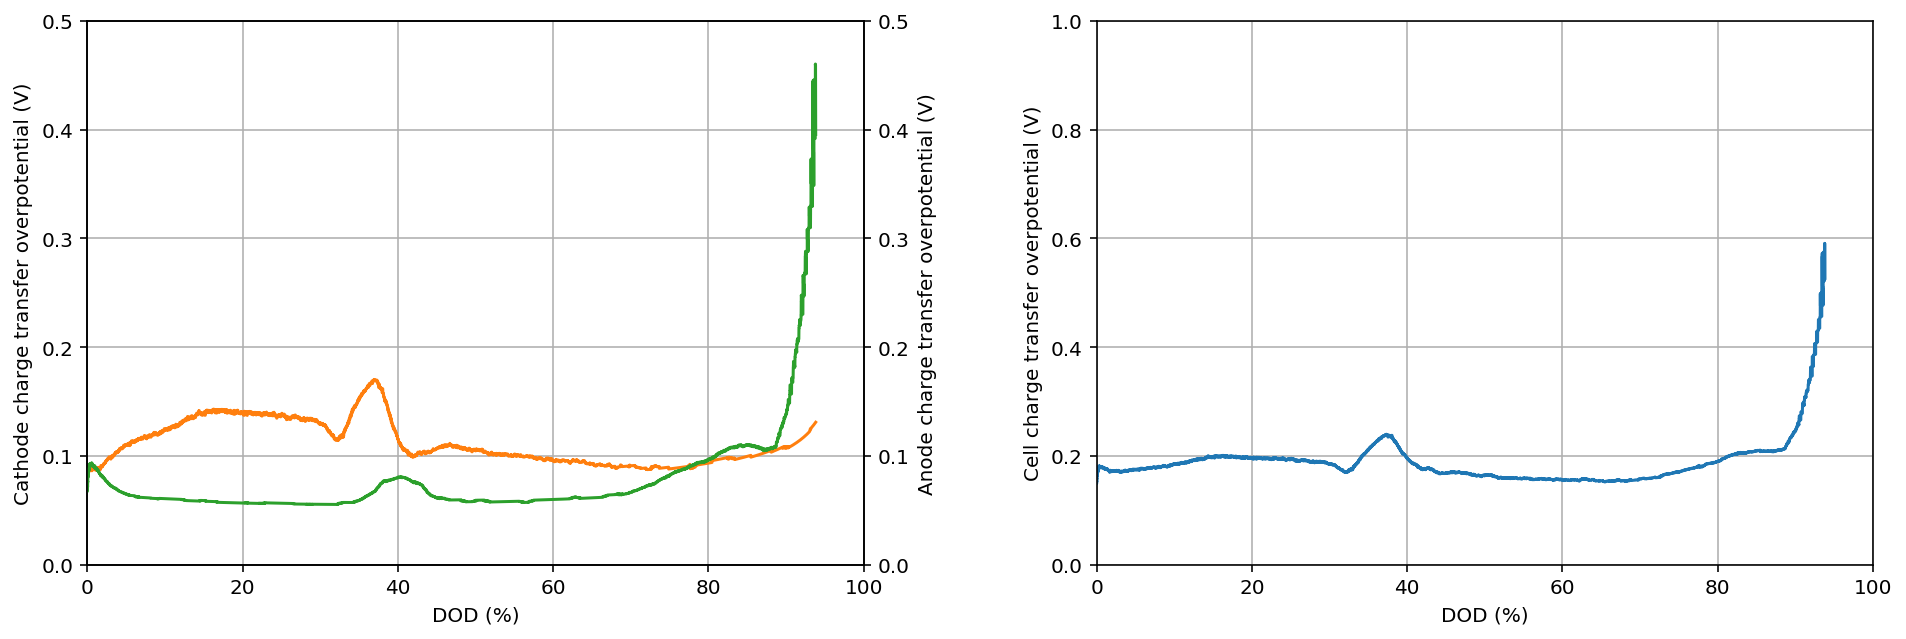

In [37]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)
ax2 = ax1.twinx()
ax1.plot(df_sim['DOD (%)'], (df_sim['Cathode OCV (V)'] - df_sim['Cathode CCV (V)']), color = new_colors[1])
ax1.set_ylabel('Cathode charge transfer overpotential (V)')
ax2.plot(df_sim['DOD (%)'], (df_sim['Anode CCV (V)'] - df_sim['Anode OCV (V)']), color = new_colors[2])
ax2.set_ylabel('Anode charge transfer overpotential (V)')
ax1.set_xlabel('DOD (%)')
ax1.set_ylim([0, 0.5])
ax2.set_ylim([0, 0.5])
ax1.set_xlim([0, 100])
ax1.grid()

ax3.plot(df_sim['DOD (%)'], (df_sim['Cell OCV (V)'] - df_sim['Cell CCV (V)']), color = new_colors[0])
ax3.set_ylabel('Cell charge transfer overpotential (V)')
ax3.set_xlabel('DOD (%)')
ax3.set_ylim([0, 1.0])
ax3.set_xlim([0, 100])
ax3.grid()

plt.show()

## Appendix